<a href="https://colab.research.google.com/github/PrimeshShamilka/fabric_defect_detector/blob/master/FabricDetectorModel5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13567 (delta 1), reused 1 (delta 0), pack-reused 13559
Receiving objects: 100% (13567/13567), 12.20 MiB | 6.90 MiB/s, done.
Resolving deltas: 100% (9254/9254), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [6]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 09_Spectrum_2019.pdf
 1331.eps
'170160E_170425X_Final AB.gdoc'
'170160E_170425X_Formatting a Paper.gdoc'
'170425X_170098U_Critical Reading .gdoc'
 170425X_Lab5.gdoc
 31.pdf
 ACM
'ASTRA 2019'
'Automation challege 1'
'Automation challenge 2 - Smart helmet'
'Automation challenge 3'
'Automation challenge 3.gslides'
'Book report.gdoc'
'Bridge design pattern.gdoc'
'B.Sc Eng. Academic Calendar - 2019-1_0.pdf'
'B.Sc Eng. Academic Calendar - 2019.pdf'
'Chamika Ishan Sudusinghe.docx'
'Chamika Ishan Sudusinghe.gdoc'
 CNN.rar
 CODES
'Colab Notebooks'
 CS2242-Design-Patterns-Sample-Question.pdf
'CSE Decrypt 2.0'
'CSE sem 2'
'CSE sem 3'
'CSE sem 4'
'CSE sem 5'
 cv
 darknet
'DENUWAN LIYANAGE (1).gdoc'
'DENUWAN LIYANAGE.docx'
'DENUWAN LIYANAGE.gdoc'
'Design and implement a firewall.gdoc'
'Digital Image Processing.gdoc'
'Documentation  of rosbridge websocket  &  rosmqtt bridge.gdoc'
 English.pdf
'Entrepreneurship society'
'Ethernet Protocol.gdoc'
'Existing Method Evaluation.gdoc'
 fdsafdsfsa.txt
'Gett

In [8]:
ls /mydrive/darknet/

classes.names      obj.zip    valid.txt                   yolov3-spp_model5.cfg
darknet53.conv.74  test.txt   yolov3_custom_best.weights
obj.data           train.txt  yolov3-spp_model4.cfg


In [0]:
!cp /mydrive/darknet/obj.zip ../

In [10]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
   creating: data/obj/train/
   creating: data/obj/train/stain/
  inflating: data/obj/train/stain/0133_Oil-Spot.jpg  
  inflating: data/obj/train/stain/0133_Oil-Spot.txt  
  inflating: data/obj/train/stain/c1r1e2n10.jpg  
  inflating: data/obj/train/stain/c1r1e2n10.txt  
  inflating: data/obj/train/stain/c1r1e2n11.jpg  
  inflating: data/obj/train/stain/c1r1e2n11.txt  
  inflating: data/obj/train/stain/c1r1e2n12.jpg  
  inflating: data/obj/train/stain/c1r1e2n12.txt  
  inflating: data/obj/train/stain/c1r1e2n14.jpg  
  inflating: data/obj/train/stain/c1r1e2n14.txt  
  inflating: data/obj/train/stain/c1r1e2n15.jpg  
  inflating: data/obj/train/stain/c1r1e2n15.txt  
  inflating: data/obj/train/stain/c1r1e2n16.jpg  
  inflating: data/obj/train/stain/c1r1e2n16.txt  
  inflating: data/obj/train/stain/c1r1e2n18.jpg  
  inflating: data/obj/train/stain/c1r1e2n18.txt  
  inflating: data/obj/train/stain/c1r1e2n19.jpg  
  inflating: data/obj/train/stain/

In [11]:
!ls


darknet  data  gdrive  sample_data


In [0]:
!cp -r data/obj darknet/data

In [0]:
!cp /mydrive/darknet/yolov3-spp_model5.cfg /content/darknet/cfg

In [0]:
!cp /mydrive/darknet/yolov3_custom_best.weights darknet/

In [0]:
!cp /mydrive/darknet/darknet53.conv.74 darknet/

In [0]:
!cp /mydrive/darknet/obj.data darknet/data

In [0]:
!cp /mydrive/darknet/classes.names darknet/data

In [0]:
!cp /mydrive/darknet/train.txt darknet/data

In [0]:
!cp /mydrive/darknet/test.txt darknet/data

In [0]:
!cp /mydrive/darknet/valid.txt darknet/data

In [21]:
!cp /mydrive/darknet/yolov3-spp_custom.cfg darknet/cfg

cp: cannot stat '/mydrive/darknet/yolov3-spp_custom.cfg': No such file or directory


In [36]:
%cd /content/darknet

/content/darknet


javascript:void(setInterval(function(){ console.log("Connect pushed"); document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click(); },60000)) 

In [37]:
!./darknet detector train data/obj.data cfg/yolov3-spp_model5.cfg darknet53.conv.74 -dont_show -map


Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 101 Avg (IOU: 0.830128, GIOU: 0.825267), Class: 0.999879, Obj: 0.994384, No Obj: 0.000816, .5R: 1.000000, .75R: 1.000000, count: 2, class_loss = 0.113355, iou_loss = 0.156883, total_loss = 0.270238 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 113 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000097, iou_loss = 0.000000, total_loss = 0.000097 

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 89.06 %, best = 95.00 % 
 3951: 0.076504, 0.058833 avg loss, 0.000010 rate, 10.302803 seconds, 252864 images, 0.313903 hours left
Loaded: 0.000034 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 89 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_

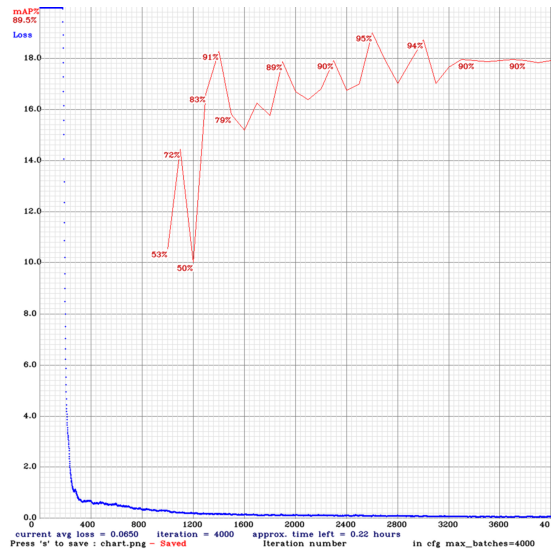

In [39]:
imShow('chart.png')

In [0]:
#./darknet detector map data/obj.data cfg/yolov3-spp_custom.cfg backup/yolov3-spp_custom_best.weights


# VALIDATION SET RESULTS 
 
 calculation mAP (mean average precision)...
36
 detections_count = 45, unique_truth_count = 20  
class_id = 0, name = stain, ap = 89.50%   	 (TP = 19, FP = 1) 

 for conf_thresh = 0.25, precision = 0.95, recall = 0.95, F1-score = 0.95  

 for conf_thresh = 0.25, TP = 19, FP = 1, FN = 1, average IoU = 69.58 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.895000, or 89.50 % 
 
Total Detection Time: 12 Seconds


# TEST SET RESULTS

 calculation mAP (mean average precision)...
36
 detections_count = 50, unique_truth_count = 19  
class_id = 0, name = stain, ap = 60.20%   	 (TP = 12, FP = 2) 

 for conf_thresh = 0.25, precision = 0.86, recall = 0.63, F1-score = 0.73 

 for conf_thresh = 0.25, TP = 12, FP = 2, FN = 7, average IoU = 64.46 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.601951, or 60.20 % 

Total Detection Time: 13 Seconds